In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


      Sex  size
0  female   314
1    male   577
      Sex  Survived
0  female  0.742038
1    male  0.188908


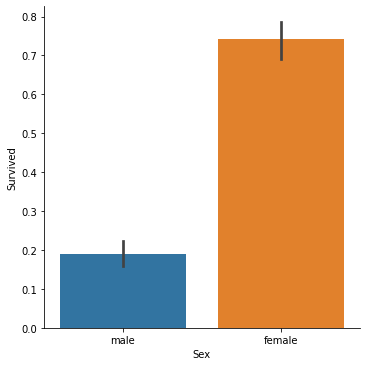

In [4]:
#Visualization by gender
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).size())

print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sn.catplot(x='Sex',y='Survived',kind='bar',data=train)

In [5]:
#Average age of survived/not survived.
train[['Age', 'Survived']].groupby(['Survived'], as_index=False).mean()

,Survived,Age
0,0,30.626179
1,1,28.343690


In [6]:
#Median age of survived/not survived.
train[['Age', 'Survived']].groupby(['Survived'], as_index=False).median()

,Survived,Age
0,0,28.0
1,1,28.0


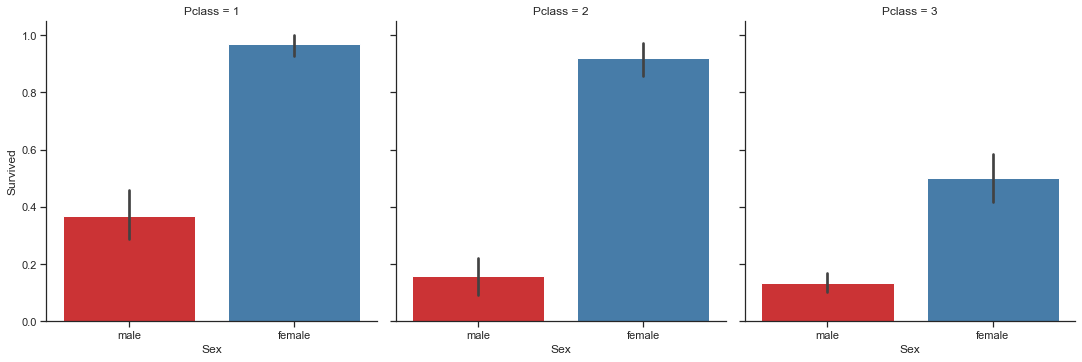

In [44]:
sn.catplot(x='Sex',y='Survived',kind='bar',legend=True,palette='Set1', data=train, col = 'Pclass')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


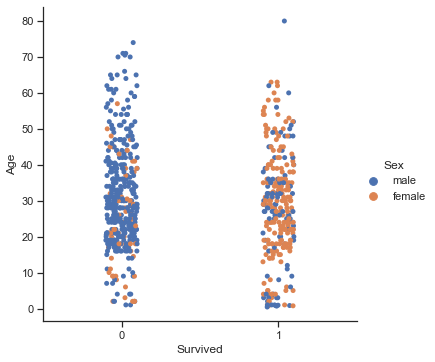

In [43]:
sn.set_theme(style="ticks")

g = sn.catplot(y='Age',x='Survived',hue='Sex', legend=True, data=train) #scatter plot

train.loc[(train['Age']==max(train['Age'])) & (train['Survived']==1)] #Maximum age of survivor

In [18]:
#Count of each embarked
train.groupby(['Embarked']).size()

Embarked
C    168
Q     77
S    644
dtype: int64

Text(0.5, 1.0, 'Survived w.r.t to Sex and Embarked point')

<Figure size 1008x432 with 0 Axes>

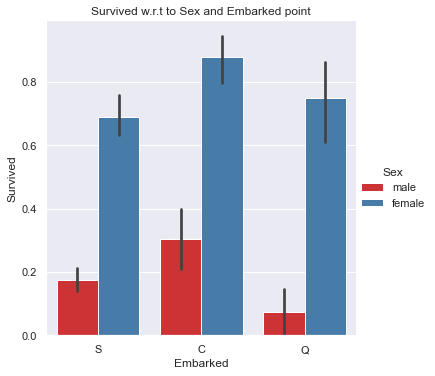

In [48]:
#Plot of survived vs embarked
sn.set_color_codes()
sn.set_theme()
plt.figure(figsize=(14, 6))
g = sn.catplot(x='Embarked',y='Survived', hue='Sex', kind='bar',palette='Set1', legend=True, data=train)
plt.title("Survived w.r.t to Sex and Embarked point")

In [54]:
#Since there is dependence on sex of the passenger, we will transfer those strings into integer values.
train_copy = train
train_copy.Sex[train_copy.Sex == 'male'] = 0 # repalce male with 0
train_copy.Sex[train_copy.Sex == 'female'] = 1
train_copy

<ipython-input-54-dce37226f70c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy.Sex[train_copy.Sex == 'male'] = 0 # repalce male with 0
<ipython-input-54-dce37226f70c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy.Sex[train_copy.Sex == 'female'] = 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [64]:
train_copy.drop(['Embarked'],axis='columns',inplace=True)
train_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148


In [66]:
train_copy.groupby('Cabin').size()
train_copy.Cabin=train_copy.Cabin.fillna('U')

In [68]:
train_copy.drop(['Name', 'Ticket',],axis = 1,inplace=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,0,22.0,1,0,7.2500,U
1,2,1,1,1,38.0,1,0,71.2833,C85
2,3,1,3,1,26.0,0,0,7.9250,U
3,4,1,1,1,35.0,1,0,53.1000,C123
4,5,0,3,0,35.0,0,0,8.0500,U
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,U
887,888,1,1,1,19.0,0,0,30.0000,B42
888,889,0,3,1,NaN,1,2,23.4500,U
889,890,1,1,0,26.0,0,0,30.0000,C148


In [69]:
train_copy.drop(['Cabin'],axis = 1,inplace=True)
train_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000
887,888,1,1,1,19.0,0,0,30.0000
888,889,0,3,1,NaN,1,2,23.4500
889,890,1,1,0,26.0,0,0,30.0000


In [97]:
#Replacing age NAN values with mean of the age
mean_age = train_copy['Age'].mean()
train_copy.Age[train_copy.Age.isnull()]= mean_age
train_copy

<ipython-input-97-1ff3b79e0cbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy.Age[train_copy.Age.isnull()]= mean_age


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.000000,1,0,7.2500
1,2,1,1,1,38.000000,1,0,71.2833
2,3,1,3,1,26.000000,0,0,7.9250
3,4,1,1,1,35.000000,1,0,53.1000
4,5,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000
887,888,1,1,1,19.000000,0,0,30.0000
888,889,0,3,1,29.699118,1,2,23.4500
889,890,1,1,0,26.000000,0,0,30.0000


In [106]:
#preprocessing
y= train_copy['Survived']
X = train_copy.drop('Survived', axis = 1)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(X)

array([[-1.73010796,  0.82737724, -0.73769513, ...,  0.43279337,
        -0.47367361, -0.50244517],
       [-1.72622007, -1.56610693,  1.35557354, ...,  0.43279337,
        -0.47367361,  0.78684529],
       [-1.72233219,  0.82737724,  1.35557354, ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [ 1.72233219,  0.82737724,  1.35557354, ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 1.72622007, -1.56610693, -0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [ 1.73010796,  0.82737724, -0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [143]:
y_pred = LR.predict(X_test)

In [144]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [123]:
LR.score(X, y)

0.7968574635241302

In [125]:
f1_score(y_test, y_pred, average='macro')

0.7507851707948843

In [161]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [177]:
test = pd.read_csv('test.csv')
testc= test
testc.drop(['Name','Cabin','Embarked'], axis=1, inplace=True)
testc.Sex[testc.Sex == 'male'] = 0 # repalce male with 0
testc.Sex[testc.Sex == 'female'] = 1
mean_age = testc['Age'].mean()
testc.Age[testc.Age.isnull()]= mean_age
testc.drop(['Ticket'], axis=1, inplace=True)
testc.Fare = testc.Fare.fillna(testc.Fare.median())

<ipython-input-177-3a54f425e6bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testc.Sex[testc.Sex == 'male'] = 0 # repalce male with 0
<ipython-input-177-3a54f425e6bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testc.Sex[testc.Sex == 'female'] = 1
<ipython-input-177-3a54f425e6bf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testc.Age[testc.Age.isnull()]= mean_age


In [178]:
testc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [182]:
X1 = scaler.fit_transform(testc)
y_pred1 = LR.predict(X1)

In [183]:
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [188]:
submission = pd.DataFrame({'PassengerId': testc['PassengerId'], 'Survived':y_pred1})
submission.to_csv('submission.csv',index=False)